# Convolutional Neural Network
Here, we will use CNN to run image classification on pnemonia data.

## Import
---
Importing necessary packages and data

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers

import pickle

import os
import gc
from timeit import default_timer as timer

### Image Directories

In [2]:
train_dir = 'DATA/train'
test_dir = 'DATA/test'
val_dir = 'DATA/validation'

In [3]:
# remove unnecessary variables clogging memory
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

## Preprocess
---

In [5]:
train_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (150,150), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')


Found 4043 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


## Baseline Model
---

In [6]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Evaluation Metrics
Since we don't want to miss any true pneumonia case, we will prioritize the recall score.

In [7]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [13]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=100, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
127/127 [==============================] - 71s 556ms/step - loss: 0.0846 - accuracy: 0.9676 - recall: 0.9780 - val_loss: 0.0669 - val_accuracy: 0.9772 - val_recall: 0.9973
Epoch 2/100
127/127 [==============================] - 74s 586ms/step - loss: 0.0740 - accuracy: 0.9711 - recall: 0.9777 - val_loss: 0.0557 - val_accuracy: 0.9812 - val_recall: 0.9907
Epoch 3/100
127/127 [==============================] - 73s 575ms/step - loss: 0.0672 - accuracy: 0.9745 - recall: 0.9813 - val_loss: 0.0477 - val_accuracy: 0.9842 - val_recall: 0.9947
Epoch 4/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0614 - accuracy: 0.9745 - recall: 0.9807 - val_loss: 0.0475 - val_accuracy: 0.9822 - val_recall: 0.9867
Epoch 5/100
127/127 [==============================] - 73s 572ms/step - loss: 0.0576 - accuracy: 0.9770 - recall: 0.9830 - val_loss: 0.0554 - val_accuracy: 0.9812 - val_recall: 0.9787
Epoch 6/100
127/127 [==============================] - 73s 576ms/step - loss: 0.

127/127 [==============================] - 72s 567ms/step - loss: 0.0023 - accuracy: 0.9990 - recall: 0.9993 - val_loss: 0.0698 - val_accuracy: 0.9881 - val_recall: 0.9947
Epoch 46/100
127/127 [==============================] - 72s 567ms/step - loss: 0.0013 - accuracy: 0.9993 - recall: 0.9997 - val_loss: 0.0629 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 47/100
127/127 [==============================] - 72s 566ms/step - loss: 0.0018 - accuracy: 0.9998 - recall: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 48/100
127/127 [==============================] - 72s 567ms/step - loss: 0.0020 - accuracy: 0.9995 - recall: 0.9993 - val_loss: 0.0868 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 49/100
127/127 [==============================] - 72s 566ms/step - loss: 6.6319e-04 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 50/100
127/127 [==============================] - 72s 569ms/step - loss: 2.519

Epoch 89/100
127/127 [==============================] - 72s 569ms/step - loss: 0.0016 - accuracy: 0.9998 - recall: 1.0000 - val_loss: 0.1436 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 90/100
127/127 [==============================] - 72s 568ms/step - loss: 4.2941e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 91/100
127/127 [==============================] - 72s 567ms/step - loss: 3.0501e-06 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.3077 - val_accuracy: 0.9743 - val_recall: 1.0000
Epoch 92/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0015 - accuracy: 0.9998 - recall: 0.9997 - val_loss: 0.1359 - val_accuracy: 0.9861 - val_recall: 0.9933
Epoch 93/100
127/127 [==============================] - 73s 573ms/step - loss: 6.9887e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 94/100
127/127 [==============================] - 73s 578

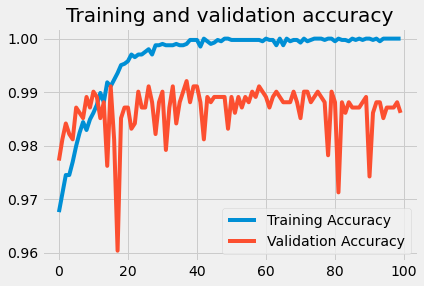

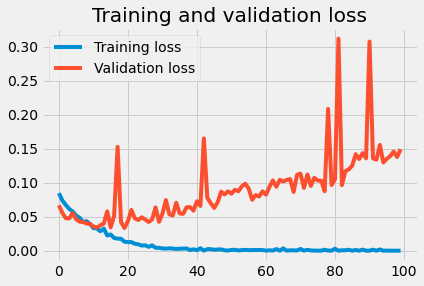

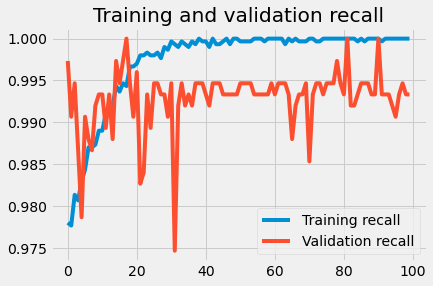

In [14]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, hist_['recall'], label='Training recall')
    plt.plot(epochs, hist_['val_recall'], label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()
    
    plt.show()
    
plot_performance(history)

In [15]:
# saving model
os.mkdir('MODEL')
model.save('MODEL/baseline_model.h5')

## Pretrained Network Model 1
---


## Data Augmentation
---
Run it if the data is generally overfitting.

## Pretrained Network Method 2
requires GPU

---
### 